<a href="https://colab.research.google.com/github/yedini/DL_tensorflow/blob/main/Part3_Lab01_Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolution

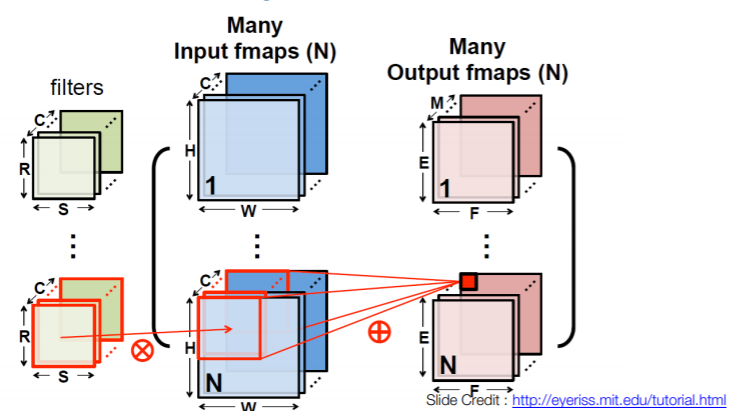

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


### tf.keras.layera.Conv2D
- filters: filter를 몇개 쓸건지
- kernel size: filter size
- padding: valid(패딩 x) 또는 same (stride=1 기준으로 했을 때 입력과 출력이 같아지도록 padding 설정)
- data_format: channels_last(default, (batch, height, width, channels) 순서) / channels_first((batch, height, width, channels))


(1, 3, 3, 1)


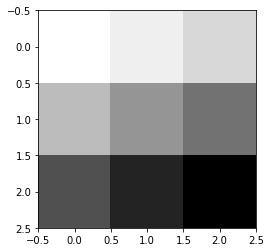

In [ ]:
## toy image

image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)   # (batch, height, weight, channel)
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

#### simple convolution layer 구성    
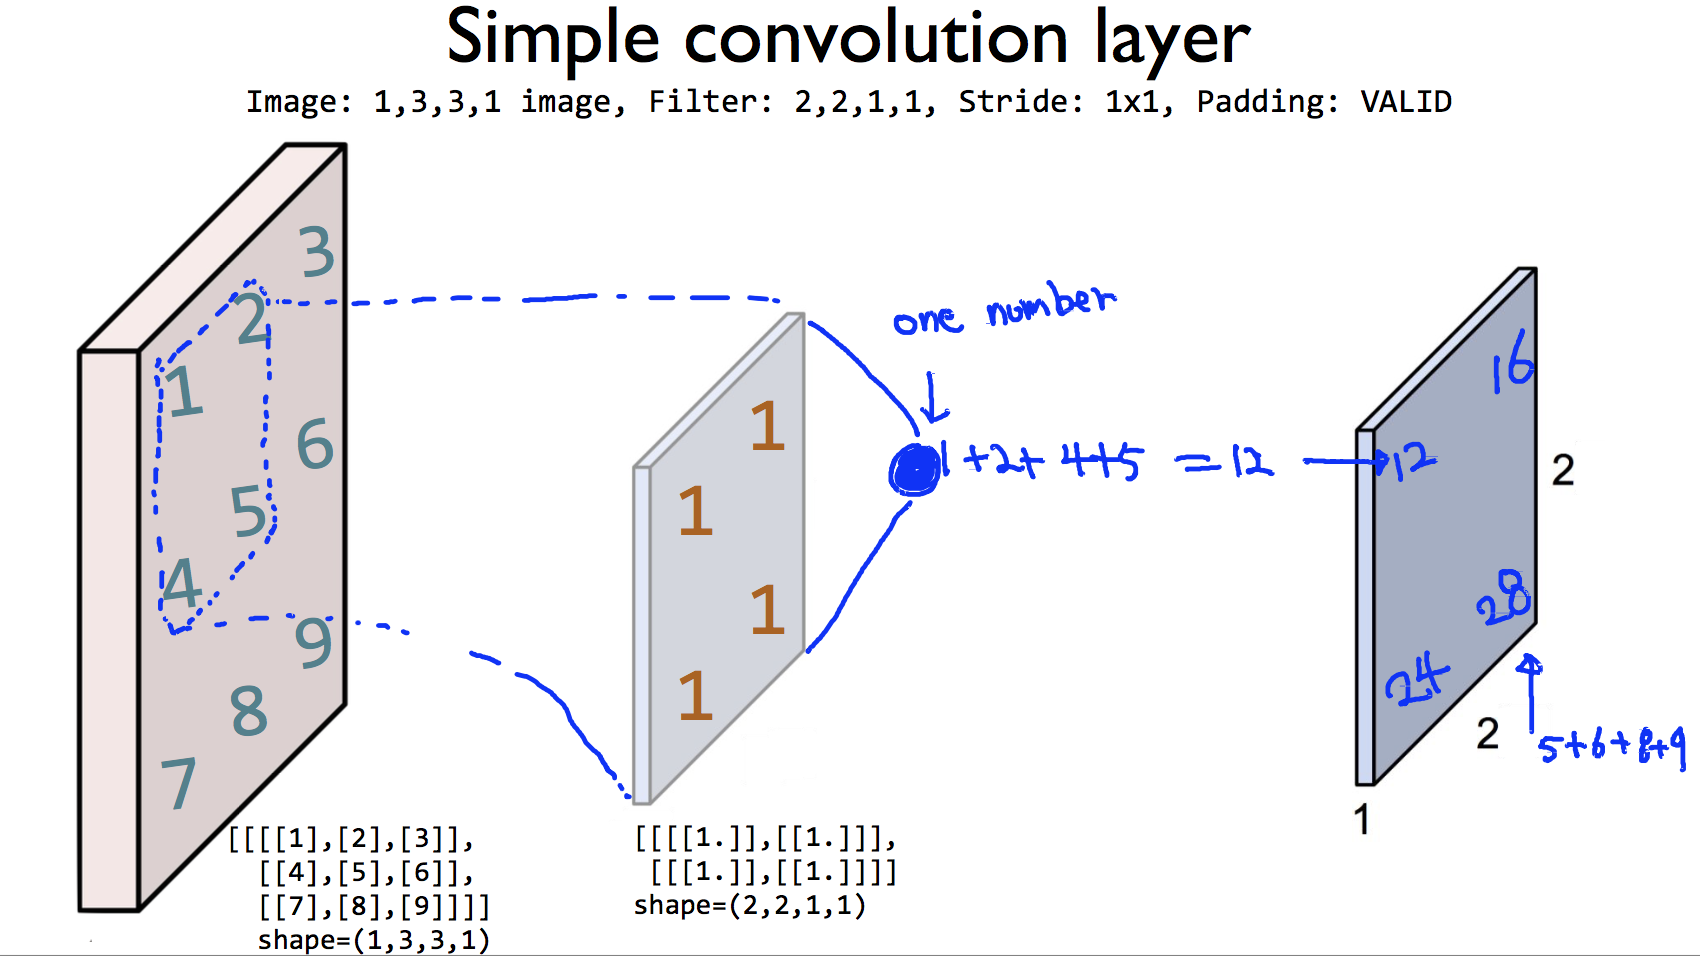

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


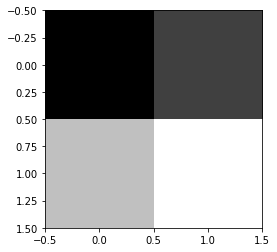

In [ ]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', 
                             kernel_initializer=weight_init)(image) #image를 input으로 넣기
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

#### padding: SAME
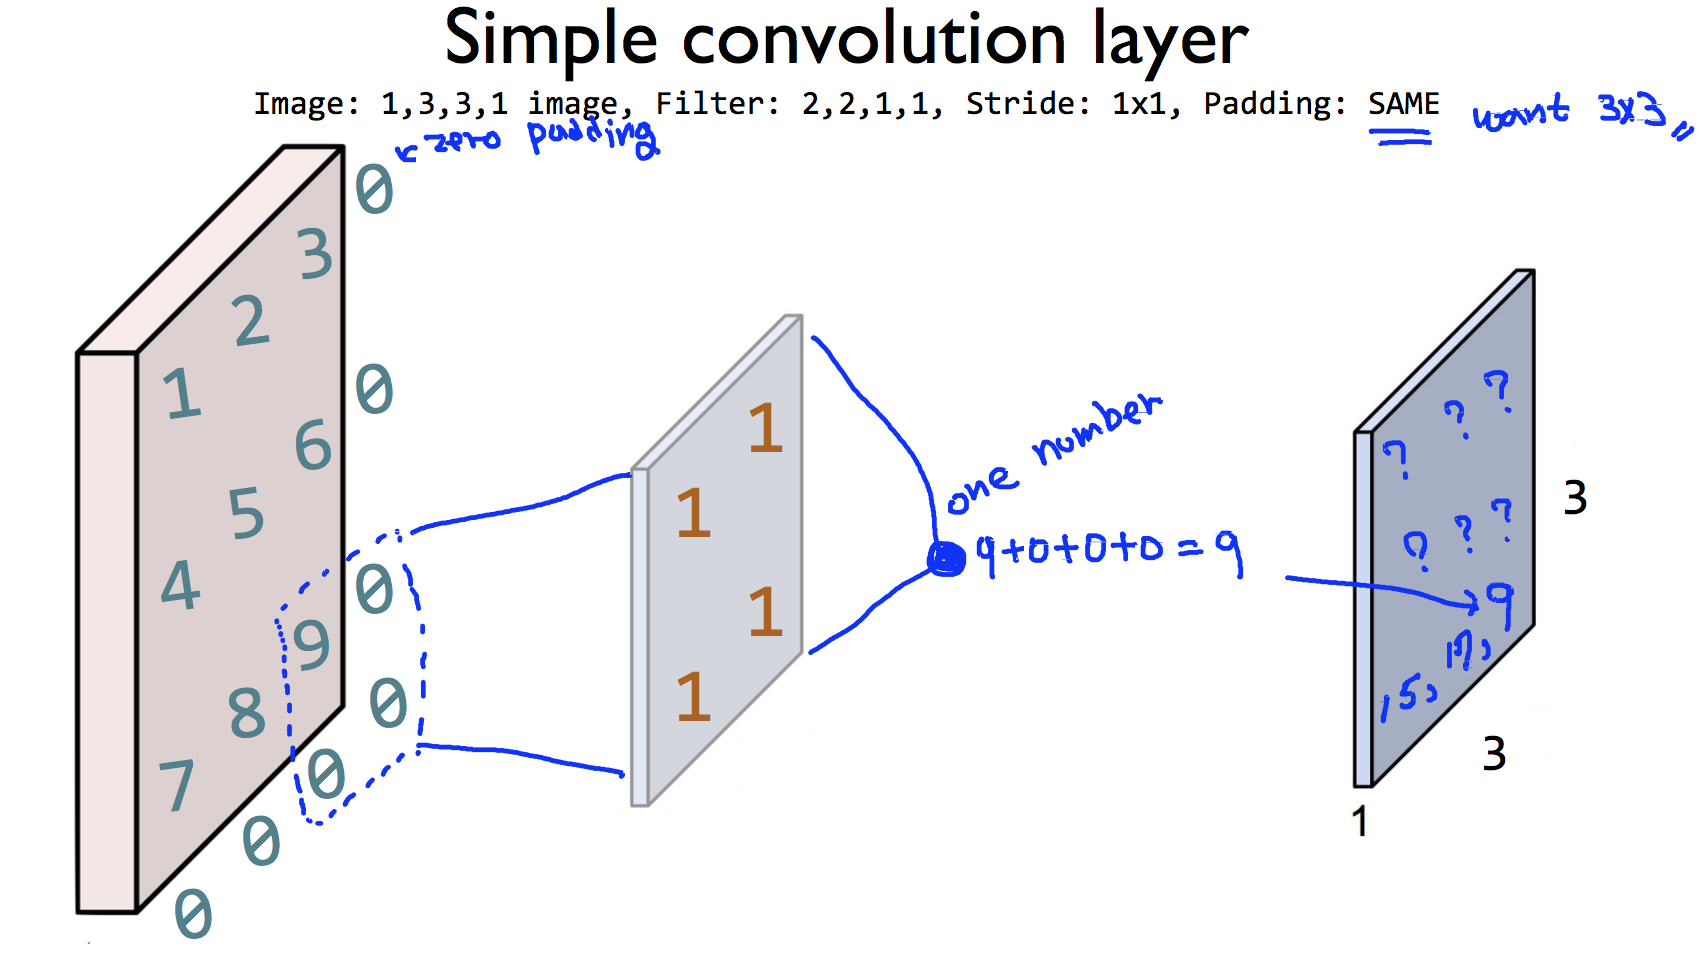

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


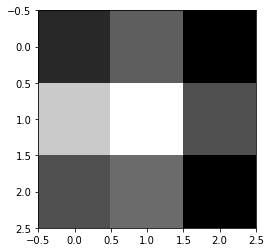

In [ ]:

print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

#### filter 3개 => filter shape (2,2,1,3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


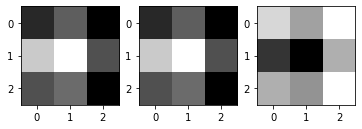

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]], #첫번째 filter느 다 1, 두번째는 다 10, 세번째는 다 -1로 채워짐.
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

## Pooling    
Max pooling, Average pooling 두가지. 보통 maxpooling을 많이 씀.
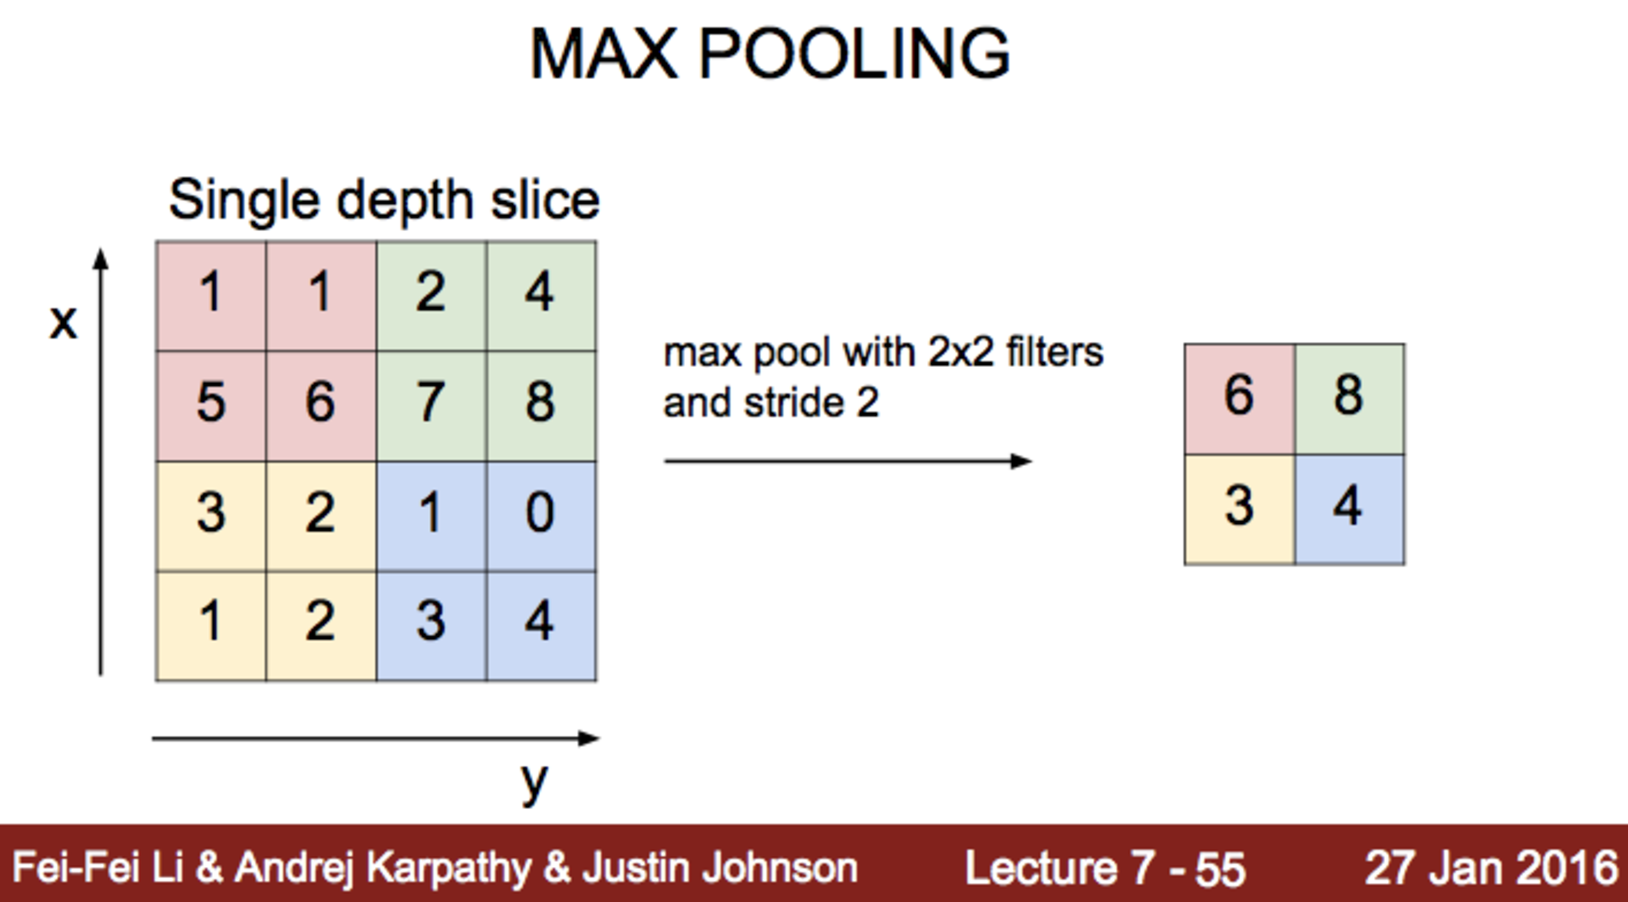

### tf.keras.layers.MaxPool2D  
- pool_size: pooling할 때의 filter size. integer값 하나 또는 두개의 값을 가진 튜플    
- stride
- padding: valid / same
- data_format: defalt는 channels_last (batch, height, width, channels)

In [ ]:
# toy image
image = tf.constant([[[[4],[3]],
                      [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding="VALID")(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


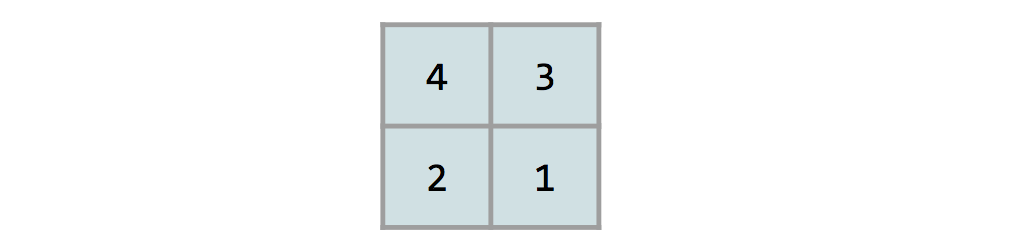       
               

4, 3, 2, 1로 이루어진 데이터에서 poolsize (2,2)로 maxpooling => 숫자 4 하나가 나오게 된다.

In [ ]:
## padding="SAME"으로 바꾸기
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding="SAME")(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


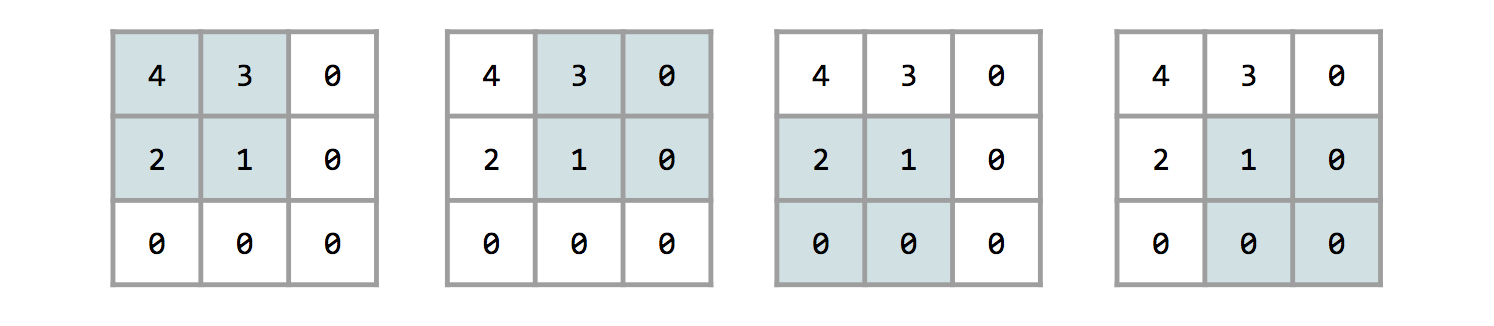

### Mnist data set 이용해서 convolution, maxpooling layer 다뤄보기

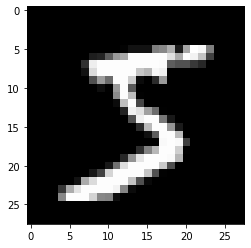

In [ ]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images.astype(np.float32) / 255.  #0~1사이의 값으로 scaling
test_images = test_images.astype(np.float32) / 255.


img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 5)


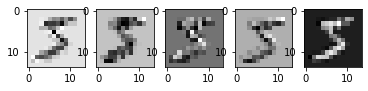

In [ ]:
## convolution 연산 적용
img = img.reshape(-1, 28, 28, 1) #convolution 연산에 넣기 위해 이미지를 4차원으로 바꿈. -1: 알아서 채워라~
img = tf.convert_to_tensor(img) #현재 img는 numpy 타입이므로 tensor로 바꿔줌. 
weight_init=keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2,2), #pooling 후 사이즈: 28/2=14!!
                             padding="SAME", kernel_initializer=weight_init)(img)
print(conv2d.shape)

feature_maps = np.swapaxes(conv2d, 0, 3) #0번째로 높은 차수와 3번째로 높은 차수의 축을 바꿔라.
for i, feature_map in enumerate(feature_maps):
  plt.subplot(1, 5, i+1), plt.imshow(feature_map.reshape(14, 14),
                                     cmap='gray')
  
plt.show()

(1, 7, 7, 5)


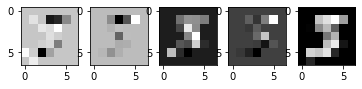

In [ ]:
#위의 output을 pooling 연산에 넣기
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2),
                              padding="SAME")(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
  plt.subplot(1, 5, i+1), plt.imshow(feature_map.reshape(7,7),
                                     cmap='gray')

plt.show()

### + Fully Connected(Dense) Layer
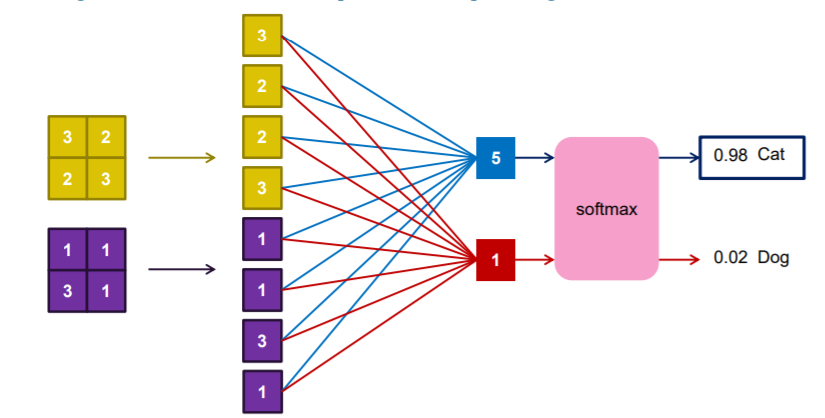